# Read receivers, transform into ObsPy and plot their velocity/ displacement spectra

In [295]:
import pandas as pd
import obspy
from obspy import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt

In [296]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (12, 4)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)

In [297]:
directory = "/import/freenas-m-04-students/fkutschera/simulations/HFFZ_fullycp_o5_180s_east/"
file = "HFFZ_full-receiver-01956-00028.dat"
#file = "HFFZ_full-receiver-01001-00026.dat"
column_names = ["Time","xx","yy","zz","xy","yz","xz","v1","v2","v3"]

In [298]:
df = pd.read_csv(directory+file, sep="\s+", skiprows=5, names=column_names)
df.head()

,Time,xx,yy,zz,xy,yz,xz,v1,v2,v3
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.3,4.667045e-66,4.667045e-66,4.667045e-66,1.752890e-81,3.546812e-82,1.916583e-82,8.977019e-73,-2.432353e-73,-6.162365e-72
4,0.4,1.863114e-56,1.863114e-56,1.863114e-56,-2.667381e-71,-7.433653e-73,2.189093e-72,-1.954486e-62,-2.204525e-62,-5.826886e-62


In [299]:
velocity = df["v3"].to_numpy()

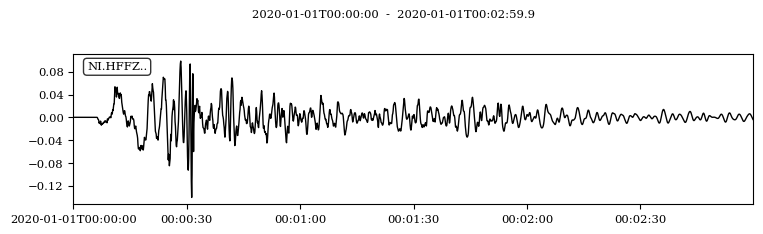

         network: NI
         station: HFFZ
        location: 
         channel: 
       starttime: 2020-01-01T00:00:00.000000Z
         endtime: 2020-01-01T00:02:59.900000Z
   sampling_rate: 10.0
           delta: 0.1
            npts: 1800
           calib: 1.0


In [300]:
tr = obspy.core.Trace(data=velocity)
tr.stats.network = "NI"
tr.stats.station = "HFFZ"
tr.stats.delta = 0.1
tr.stats.starttime = UTCDateTime("2020-01-01")
tr.plot();
print(tr.stats)

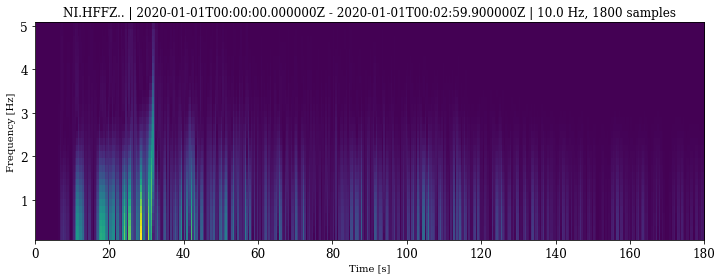

In [301]:
fig = tr.spectrogram(show=False, per_lap=0.5, wlen=1)

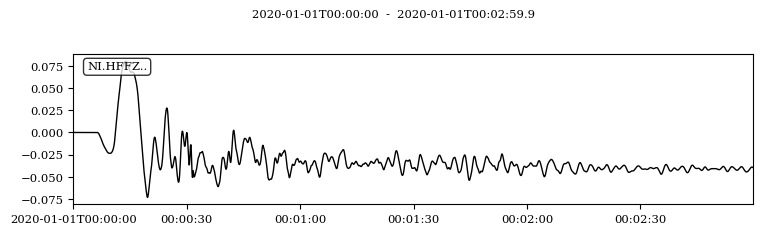

In [302]:
displacement = tr.copy()
displacement.integrate(method="cumtrapz")
displacement.plot();

In [303]:
# use https://numpy.org/doc/stable/reference/generated/numpy.fft.rfftfreq.html
fft_disp = np.fft.rfft(displacement)
fft_vel = np.fft.rfft(velocity)

In [304]:
# frequency 
freq = np.fft.rfftfreq(n=velocity.size, d=1/tr.stats.sampling_rate)

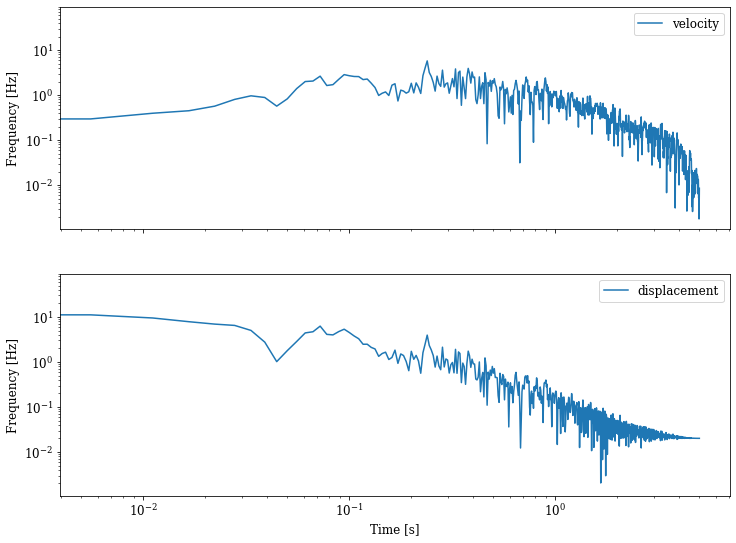

In [305]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,9))
ax1.plot(freq, abs(fft_vel), label="velocity")
ax1.set_ylabel("Frequency [Hz]", fontsize=12)
ax1.legend(fontsize=12)

ax2.plot(freq, abs(fft_disp), label="displacement")
ax2.set_xlabel("Time [s]", fontsize=12)
ax2.set_ylabel("Frequency [Hz]", fontsize=12)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(fontsize=12);

## Include taper

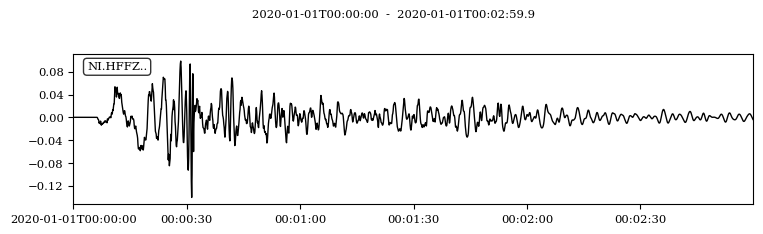

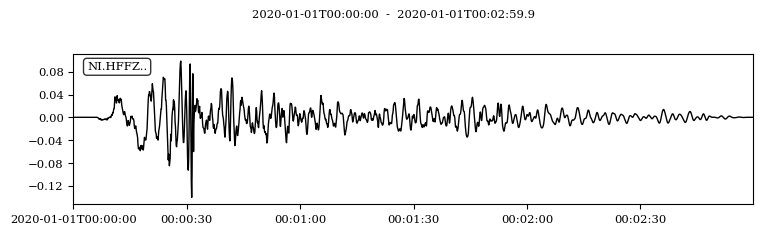

In [306]:
# taper original velocity signal
max_percentage = 0.1
vel_tapered = tr.copy()
vel_tapered.taper(max_percentage=max_percentage, type='hann', max_length=None, side='both')
tr.plot();
vel_tapered.plot();

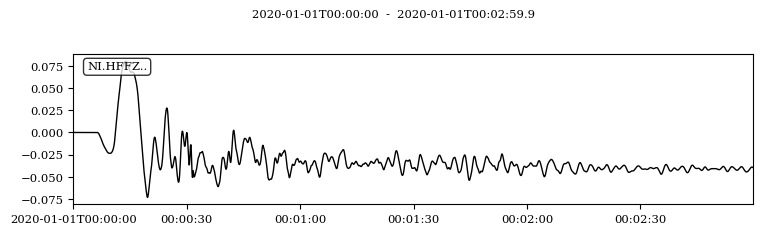

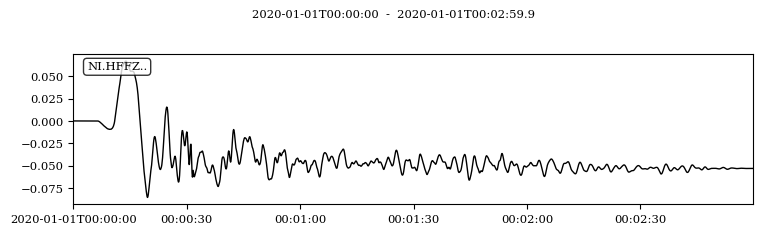

In [307]:
disp_taper = vel_tapered.copy()
disp_taper.integrate(method="cumtrapz")
displacement.plot();
disp_taper.plot();

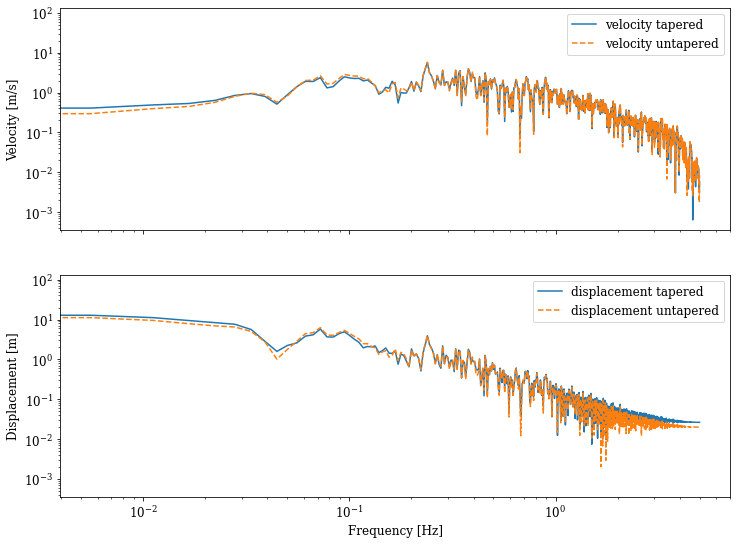

In [308]:
fft_disp_taper = np.fft.rfft(disp_taper)
fft_vel_taper = np.fft.rfft(vel_tapered)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,9))
ax1.plot(freq, abs(fft_vel_taper), label="velocity tapered")
ax1.plot(freq, abs(fft_vel), "--", label="velocity untapered")
ax1.set_ylabel("Velocity [m/s]", fontsize=12)
ax1.legend(fontsize=12)

ax2.plot(freq, abs(fft_disp_taper), label="displacement tapered")
ax2.plot(freq, abs(fft_disp), "--", label="displacement untapered")
ax2.set_xlabel("Frequency [Hz]", fontsize=12)
ax2.set_ylabel("Displacement [m]", fontsize=12)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(fontsize=12);

In [309]:
omega = 2* np.pi * freq

/import/freenas-m-04-students/fkutschera/miniconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in reciprocal
  after removing the cwd from sys.path.
/import/freenas-m-04-students/fkutschera/miniconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


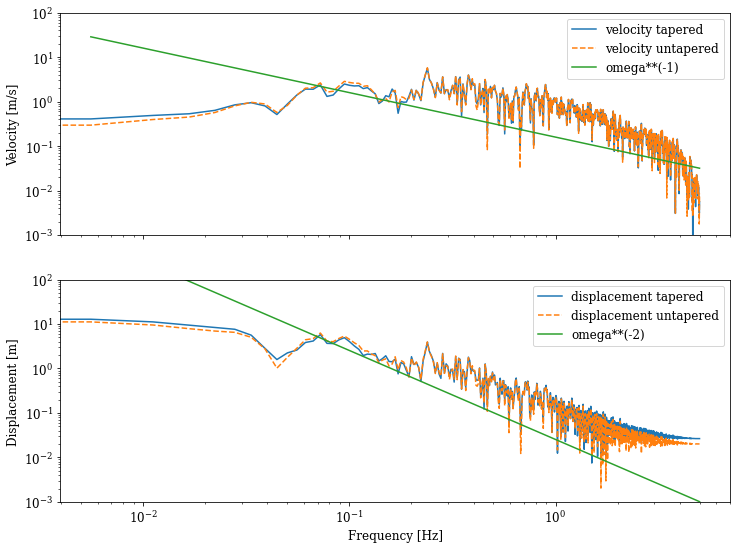

In [310]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,9))
ax1.plot(freq, abs(fft_vel_taper), label="velocity tapered")
ax1.plot(freq, abs(fft_vel), "--", label="velocity untapered")
ax1.plot(freq, abs(omega)**(-1), label="omega**(-1)")
ax1.set_ylabel("Velocity [m/s]", fontsize=12)
ax1.legend(fontsize=12)

ax2.plot(freq, abs(fft_disp_taper), label="displacement tapered")
ax2.plot(freq, abs(fft_disp), "--", label="displacement untapered")
ax2.plot(freq, abs(omega**(-2)), label="omega**(-2)")
ax2.set_ylabel("Displacement [m]", fontsize=12)
ax2.set_xlabel("Frequency [Hz]", fontsize=12)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(fontsize=12)
ax2.set_ylim(1e-3, 1e2);

## Obtain displacement in different way

In [311]:
fft_disp_new = fft_vel / (1j * omega)
fft_disp_new_taper = fft_vel_taper / (1j * omega)

/import/freenas-m-04-students/fkutschera/miniconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/import/freenas-m-04-students/fkutschera/miniconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/import/freenas-m-04-students/fkutschera/miniconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/import/freenas-m-04-students/fkutschera/miniconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


/import/freenas-m-04-students/fkutschera/miniconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/import/freenas-m-04-students/fkutschera/miniconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in power
  if sys.path[0] == '':


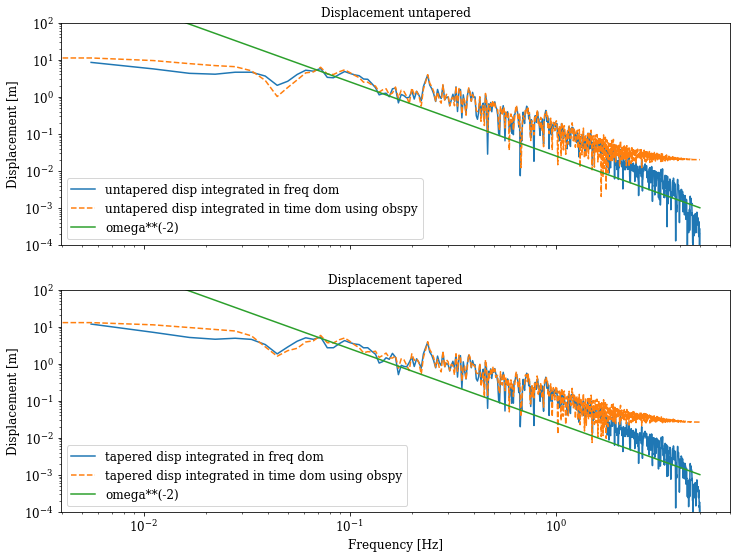

In [312]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,9))
ax1.set_title("Displacement untapered")
ax1.plot(freq, abs(fft_disp_new), label="untapered disp integrated in freq dom")
ax1.plot(freq, abs(fft_disp), "--", label="untapered disp integrated in time dom using obspy")
ax1.plot(freq, abs(omega)**(-2), label="omega**(-2)")
ax1.set_ylabel("Displacement [m]", fontsize=12)
ax1.legend(fontsize=12)

ax2.set_title("Displacement tapered")
ax2.plot(freq, abs(fft_disp_new_taper), label="tapered disp integrated in freq dom")
ax2.plot(freq, abs(fft_disp_taper), "--", label="tapered disp integrated in time dom using obspy")
ax2.plot(freq, abs(omega**(-2)), label="omega**(-2)")
ax2.set_ylabel("Displacement [m]", fontsize=12)
ax2.set_xlabel("Frequency [Hz]", fontsize=12)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(fontsize=12)
ax2.set_ylim(1e-4, 1e2);

# Final plot using the tapered signal

/import/freenas-m-04-students/fkutschera/miniconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in reciprocal
  after removing the cwd from sys.path.
/import/freenas-m-04-students/fkutschera/miniconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':


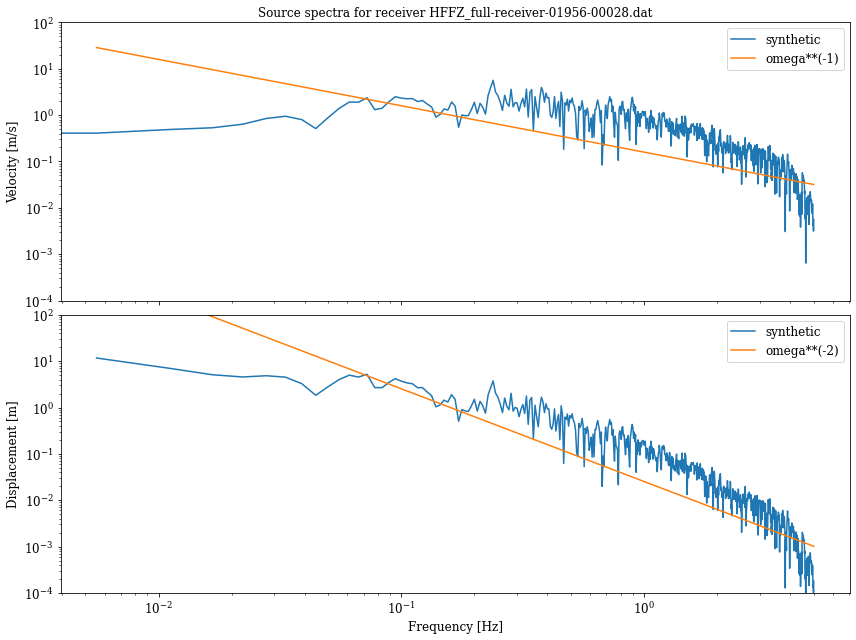

In [313]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,9))
ax1.set_title("Source spectra for receiver {}".format(file))
ax1.plot(freq, abs(fft_vel_taper), label="synthetic")
ax1.plot(freq, abs(omega)**(-1), label="omega**(-1)")
ax1.set_ylabel("Velocity [m/s]", fontsize=12)
ax1.legend(fontsize=12)

ax2.plot(freq, abs(fft_disp_new_taper), label="synthetic")
ax2.plot(freq, abs(omega**(-2)), label="omega**(-2)")
ax2.set_ylabel("Displacement [m]", fontsize=12)
ax2.set_xlabel("Frequency [Hz]", fontsize=12)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(fontsize=12)
plt.tight_layout()
ax2.set_ylim(1e-4, 1e2);